In [12]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesIntegration
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
import Meshes: coordinates
using Plots

Point3 = EnvelopeApproximation.Point3


Point3 (alias for Meshes.Point{3, Float64})

# Setting up the bubbles

In [13]:
d = 1.
ΔV = 1.
ηs = LinRange(0.5, 15, 100)
bubbless = bubbless = [Bubbles([Bubble(Point3(0., 0., -d / 2) , η), Bubble(Point3(0., 0., d / 2), η)]) for η in ηs]
bubbless

100-element Vector{Bubbles}:
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.5), Bubble(Point(0.0, 0.0, 0.5), 0.5)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.6464646464646465), Bubble(Point(0.0, 0.0, 0.5), 0.6464646464646465)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.7929292929292929), Bubble(Point(0.0, 0.0, 0.5), 0.7929292929292929)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.9393939393939394), Bubble(Point(0.0, 0.0, 0.5), 0.9393939393939394)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.0858585858585859), Bubble(Point(0.0, 0.0, 0.5), 1.0858585858585859)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.2323232323232323), Bubble(Point(0.0, 0.0, 0.5), 1.2323232323232323)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.378787878787879), Bubble(Point(0.0, 0.0, 0.5), 1.378787878787879)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.525252525252525), Bubble(Point(0.0, 0.0, 0.5), 1.525252525252525)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.6717171717171

# Setting up the Ks

In [14]:
k_vecs = [Point3(0., 1., 1.)]
norm(p:: Point3) = norm(coordinates(p), 2)

norm (generic function with 23 methods)

In [15]:
k_vecs

1-element Vector{Meshes.Point3}:
 Point(0.0, 1.0, 1.0)

# Computing Numerically

In [32]:
tensor_directions = [(:x, :x), (:y, :y), (:z, :z)]
T_ij = EnvelopeApproximation.StressEnergyTensor.T_ij
numerical_T_ij = [T_ij(k_vecs, bubbles,  50, 10, 100, ΔV) for bubbles in bubbless]

100-element Vector{Dict{Union{Symbol, Tuple{Vararg{Symbol, N}}} where N, Union{Vector{ComplexF64}, Vector{Meshes.Point3}}}}:
 Dict((:z, :z) => ComplexF64[-0.5973744126696077 - 6.4461036877218325e-15im], :k => Meshes.Point3[Point(0.0, 1.0, 1.0)], (:x, :z) => ComplexF64[1.3349239248727773e-18 + 7.108300493358088e-18im], (:y, :y) => ComplexF64[-0.5973360785440294 - 6.441243306791369e-15im], :trace => ComplexF64[0.8443127283471485 - 3.0357660829594124e-18im], (:x, :y) => ComplexF64[1.3524151552335786e-17 + 1.7520029481007948e-17im], (:x, :x) => ComplexF64[-0.5825588583109502 - 6.432105621235508e-15im], (:y, :z) => ComplexF64[-0.014780891382675748 + 4.851804721872632e-18im])
 Dict((:z, :z) => ComplexF64[-1.380330818760613 - 0.00027486044417751365im], :k => Meshes.Point3[Point(0.0, 1.0, 1.0)], (:x, :z) => ComplexF64[-1.0525991212293408e-5 + 1.4640457852829769e-5im], (:y, :y) => ComplexF64[-1.2135444740134416 - 0.00012497895282680905im], :trace => ComplexF64[1.4825413380570882 - 0.00039898453

# Z Z

In [33]:
T_zz = [d[(:z, :z)][1] for d in numerical_T_ij]  .|> real

100-element Vector{Float64}:
  -0.5973744126696077
  -1.380330818760613
  -2.1906010121454655
  -3.612739395293854
  -5.164777092980236
  -6.817983197969848
  -8.206956062342098
  -9.80725318446198
 -11.903213997671267
 -13.648723728869458
   ⋮
 459.6723023103284
 470.82595061538467
 578.5334090824399
 448.0488970196369
 430.96052145044746
 294.86621238311494
 446.92500098997516
 366.6576372471016
 114.72502486576794

In [34]:
T_zz

100-element Vector{Float64}:
  -0.5973744126696077
  -1.380330818760613
  -2.1906010121454655
  -3.612739395293854
  -5.164777092980236
  -6.817983197969848
  -8.206956062342098
  -9.80725318446198
 -11.903213997671267
 -13.648723728869458
   ⋮
 459.6723023103284
 470.82595061538467
 578.5334090824399
 448.0488970196369
 430.96052145044746
 294.86621238311494
 446.92500098997516
 366.6576372471016
 114.72502486576794

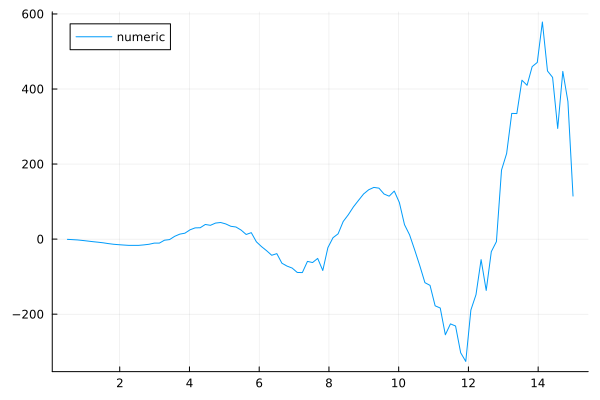

In [35]:
plot(ηs, T_zz, label="numeric")